In [695]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
df_fica = pd.read_excel("OASDI_FICA_Breakdown.xlsx")
df_fica = df_fica.T
df_fica.columns = df_fica.iloc[0]
df_fica.drop(index = "Program and Source", inplace = True)

In [209]:
df_fica.tail()

Program and Source,Old-Age and Survivors Insurance (OASI),OASI_Employer,OASI_Employee,OASI_Self-employed,OASI_General Fund Reimbursement,OASI_Taxation of benefits,Disability Insurance (DI),DI_Employer,DI_Employee,DI_Self-employed,DI_General Fund Reimbursement,DI_Taxation of benefits
2019,839992,384005,381121,39966,11,34890,140961,65906,65222,8249,2,1583
2020,895014,408227,404962,42791,3,39032,146997,69299,68747,7247,b,1704
2021,875387,398575,395425,44235,1,37151,142826,67677,67143,7547,b,459
2022,992996,452446,448042,45436,b,47071,162231,76842,76096,7740,b,1553
2023,1103842,503960,498593,51524,b,49764,179972,85582,84671,8770,b,950


In [213]:
df_fica["tot"] = df_fica["OASI_Employer"]+df_fica["OASI_Employee"]+df_fica["OASI_Self-employed"]+df_fica["DI_Employer"]+df_fica["DI_Employee"]+df_fica["DI_Self-employed"]
df_fica["Employer_Employee"] = (df_fica["OASI_Employer"]+df_fica["OASI_Employee"]+df_fica["DI_Employer"]+df_fica["DI_Employee"])/df_fica["tot"]
df_fica["self_employ"] = (df_fica["OASI_Self-employed"]+df_fica["DI_Self-employed"])/df_fica["tot"]

In [245]:
df_ben = pd.read_excel("SS_Data_by_Type_of_Beneficiary2.xlsx")
df_ben.rename(columns={ df_ben.columns[0]: "Year" }, inplace = True)

In [457]:
df_ben.columns

Index(['Year', 'Retired_Worker_Total_Amount',
       'Retired_Worker_Total_Average_Amount', 'Retired_Worker_Male_Number',
       'Retired_Worker_Male_Average_Amount',
       'Retired_Worker_Male_Female_Number',
       'Retired_Worker_Female_Average_Amount',
       'Spouse_of_Retired_Worker_Total_Number',
       'Spouse_of_Retired_Worker_Total_Average_Amount',
       'Spouse_of_Retired_Worker_Male_Number',
       'Spouse_of_Retired_Worker_Male_Average_Amount',
       'Spouse_of_Retired_Worker_Female_Number',
       'Spouse_of_Retired_Worker_Female_Average_Amount',
       'Child_Of_Retired_Worker_Total_Number',
       'Child_Of_Retired_Worker_Total_Average_Amount',
       'Child_Of_Retired_Worker_Minor_Number',
       'Child_Of_Retired_Worker_Minor_Average_Amount',
       'Child_Of_Retired_Worker_Disabled_Number',
       'Child_Of_Retired_Worker_Disabled_Average_Amount',
       'Child_Of_Retired_Worker_Student_Number',
       'Child_Of_Retired_Worker_Student_Average_Amount',
       'Chil

In [519]:
df_ben_year = df_ben.groupby(df_ben['Year'].dt.year).apply(lambda x: x.iloc[:, 1:].sum())
def extract_beneficiary_type(specified_beneficiary):
    x = df_ben_year.columns.str.startswith(specified_beneficiary) #gets the columns in an index with T and F
    #x[0] = True #makes the date column from False to True
    df_return = df_ben_year[df_ben_year.columns[x]]
    return df_return

beneficiary_types_ls = [
    
    "Retired_Worker", #0 - ret work
    "Spouse_of_Retired_Worker", #1 - ret work
    "Child_Of_Retired_Worker", #2 - ret work
    "Child_Of_Deceased_Worker", #surv - 3
    "Aged_Widower",#surv
    "Young_Widower_With_Child_In_Care",#surv
    "Disabled_Widower",#surv
    "Parent_Of_Deceased_Worker",#surv -7
    "Disabled_Worker", #dis - 8
    "Spouse_Of_Disabled_Worker",
    "Child_Of_Disabled_Worker" #dis - 10
]


In [523]:
retired_workers_category = extract_beneficiary_type(beneficiary_types_ls[0]).sum(axis = 1) + \
    extract_beneficiary_type(beneficiary_types_ls[1]).sum(axis = 1) + \
    extract_beneficiary_type(beneficiary_types_ls[2]).sum(axis = 1)

survivors_category = extract_beneficiary_type(beneficiary_types_ls[3]).sum(axis = 1) + \
    extract_beneficiary_type(beneficiary_types_ls[4]).sum(axis = 1) + \
    extract_beneficiary_type(beneficiary_types_ls[5]).sum(axis = 1) + \
    extract_beneficiary_type(beneficiary_types_ls[6]).sum(axis = 1) + \
    extract_beneficiary_type(beneficiary_types_ls[7]).sum(axis = 1)

disabled_category = extract_beneficiary_type(beneficiary_types_ls[8]).sum(axis = 1) + \
    extract_beneficiary_type(beneficiary_types_ls[9]).sum(axis = 1) + \
    extract_beneficiary_type(beneficiary_types_ls[10]).sum(axis = 1)

tot = df_ben_year[:].sum(axis = 1)

df_ben_year["Retired_prop"] = retired_workers_category/tot
df_ben_year["Survivors_prop"] = survivors_category/tot
df_ben_year["Disabled_prop"] = disabled_category/tot

In [535]:
df_ben_year.tail()

,Retired_Worker_Total_Amount,Retired_Worker_Total_Average_Amount,Retired_Worker_Male_Number,Retired_Worker_Male_Average_Amount,Retired_Worker_Male_Female_Number,Retired_Worker_Female_Average_Amount,Spouse_of_Retired_Worker_Total_Number,Spouse_of_Retired_Worker_Total_Average_Amount,Spouse_of_Retired_Worker_Male_Number,Spouse_of_Retired_Worker_Male_Average_Amount,...,Child_Of_Disabled_Worker_Total_Average_Amount,Child_Of_Disabled_Worker_Minor_Number,Child_Of_Disabled_Worker_Minor_Average_Amount,Child_Of_Disabled_Worker_Disabled_Number,Child_Of_Disabled_Worker_Disabled_Average_Amount,Child_Of_Disabled_Worker_Student_Number,Child_Of_Disabled_Worker_Student_Average_Amount,Retired_prop,Survivors_prop,Disabled_prop
Year,,,,,,,,,,,,,,,,,,,,,
2020,550362369.0,18200.02,272712349.0,20218.00,277650020.0,16217.90,28614834.0,9449.72,2460381.0,8098.04,...,4709.07,14954476.0,4505.06,1472277.0,6218.99,457257.0,6514.07,0.757121,0.091278,0.151601
2021,561644248.0,18766.41,276856558.0,20818.33,284787690.0,16771.64,26823691.0,9589.24,2209496.0,8113.56,...,4843.77,13801333.0,4633.23,1416083.0,6358.86,392405.0,6766.56,0.764448,0.090270,0.145282
2022,575858275.0,20189.54,282556885.0,22364.30,293301390.0,18094.48,25019230.0,10087.33,1859056.0,8227.78,...,5204.97,12586558.0,4975.46,1344564.0,6803.83,358507.0,7229.36,0.772933,0.089444,0.137623
2023,594198542.0,22114.49,290535262.0,24464.59,303663280.0,19865.94,23456487.0,10735.55,1487483.0,8030.71,...,5699.33,11557706.0,5444.96,1284242.0,7410.53,339260.0,7859.11,0.782309,0.087738,0.129953
2024,458734611.0,17244.72,223789210.0,19058.20,234945401.0,15517.36,16925216.0,8198.69,984475.0,5693.55,...,4438.55,8099324.0,4234.46,947592.0,5735.56,253542.0,6066.41,0.790277,0.085938,0.123785


Program and Source
Old-Age and Survivors Insurance (OASI)      710334
OASI_Employer                               322395
OASI_Employee                               319939
OASI_Self-employed                           37169
OASI_General Fund Reimbursement                278
OASI_Taxation of benefits                    30554
Disability Insurance (DI)                   116508
DI_Employer                                  54747
DI_Employee                                  54330
DI_Self-employed                              6312
DI_General Fund Reimbursement                   47
DI_Taxation of benefits                       1071
tot                                         794892
Employer_Employee                         0.945299
self_employ                               0.054701
Name: 2015, dtype: object

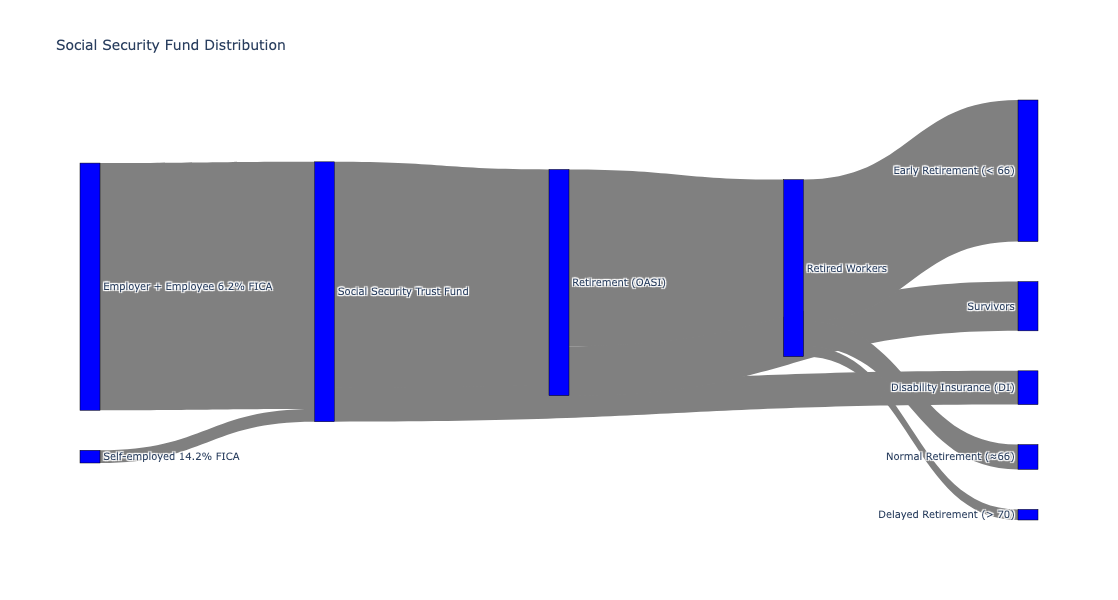

In [669]:
import plotly.graph_objects as go

# Define the nodes (with unique flow relationships)
node_labels = [
    "Employer + Employee 6.2% FICA",  # 0
    "Self-employed 14.2% FICA",       # 1
    "Social Security Trust Fund",     # 2
    "Retirement (OASI)",               # 3
    "Retired Workers",                 # 4
    "Normal Retirement (≈66)",       # 5
    "Early Retirement (< 66)",  # 6
    "Delayed Retirement (> 70)",       # 7
    "Survivors",                      # 8
    "Disability Insurance (DI)"       # 9
]

# Define the links (flows between nodes)
link_sources = [
    0, 1,  # Employer + Employee FICA and Self-employed FICA -> Trust Fund
    2, 2,  # Trust Fund -> Retirement (OASI) and Disability Insurance (DI)
    3, 3,  # Retirement (OASI) -> Retired Workers and Survivors
    4, 4, 4  # Retired Workers -> FRA, Early FRA, Max
]

link_targets = [
    2, 2,  # Employer + Employee and Self-employed FICA -> Trust Fund
    3, 9,  # Trust Fund -> Retirement (OASI) and Disability Insurance (DI)
    4, 8,  # Retirement (OASI) -> Retired Workers and Survivors
    6, 5, 7  # Retired Workers -> FRA, Early FRA, Max
]

# Manually define the flow values (can be modified with your actual data)
link_values = [
    100*df_fica["Employer_Employee"].loc[2023], 100*df_fica["self_employ"].loc[2023],  # FICA contributions in 2023
    100*(df_ben_year["Retired_prop"].loc[2023]+df_ben_year["Survivors_prop"].loc[2023]), 100*df_ben_year["Disabled_prop"].loc[2023],    # Trust Fund flows
    100*(df_ben_year["Retired_prop"].loc[2023]+df_ben_year["Survivors_prop"].loc[2023])*(df_ben_year["Retired_prop"].loc[2023]), \
        100*(df_ben_year["Retired_prop"].loc[2023]+df_ben_year["Survivors_prop"].loc[2023]) -  100*(df_ben_year["Retired_prop"].loc[2023]+df_ben_year["Survivors_prop"].loc[2023])*(df_ben_year["Retired_prop"].loc[2023]),    # Retirement (OASI) flows
    68.1*(1-0.2), 68.1*0.14, 68.1*0.06 # Retired Workers flows
]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=40,               # Increase space between nodes
        thickness=20,         # Adjust node thickness
        line=dict(color="black", width=0.5),
        label=node_labels,
        color="blue",
        # Adjust Y positions of nodes to avoid overlap and make the OASI branch go up
        y=[0.85, 0.85, 0.6, 0.75, 0.5, 0.35, 0.35, 0.35, 0.25, 0.2]  # Adjusted Y positions
    ),
    link=dict(
        source=link_sources,
        target=link_targets,
        value=link_values,
        color="gray"
    )
)])

# Update the layout to make the diagram taller and more readable
fig.update_layout(
    title_text="Social Security Fund Distribution",
    font_size=10,
    height=600,   # Increase height for vertical space
    width=1000,   # Adjust width for better node spacing
    showlegend=False  # Remove legend (optional)
)

# Show the figure
fig.show()


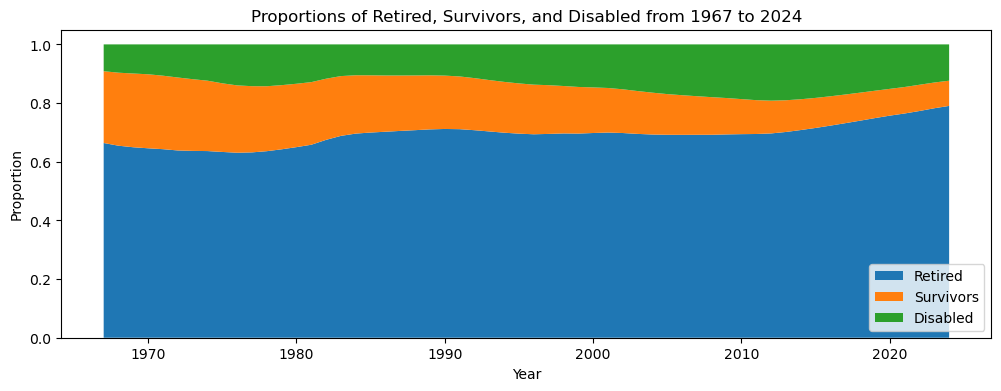

In [747]:
df_ben_year

plt.figure(figsize = (12,4))

plt.stackplot(range(1967, 2025),
              df_ben_year["Retired_prop"], 
              df_ben_year["Survivors_prop"], 
              df_ben_year["Disabled_prop"],
              labels=["Retired", "Survivors", "Disabled"])
plt.legend(loc="lower right")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.title("Proportions of Retired, Survivors, and Disabled from 1967 to 2024")
plt.show()

In [705]:
df_ben_year[["Retired_prop", "Survivors_prop","Disabled_prop"]]
df_ben_year.index


range(1967, 2025)